<h1 align="center"> Credit Fraud Detector </h1>

In this project, the goal is to develop a machine learning model capable of identifying fraudulent credit card transactions based on transaction data. This is a typical example of a binary classification problem, where the objective is to predict whether a transaction is legitimate or fraudulent. The project involves analyzing real-world data, preprocessing it, selecting appropriate features, and then building a predictive model.

Fraudulent transactions pose a significant risk to financial institutions and consumers, so developing accurate fraud detection systems is crucial. By using machine learning techniques, we aim to build a model that can help detect fraud and prevent financial losses.

<h2>Phases of the Project:</h2>
<h2>1. Problem Definition</h2>
In this initial phase, we define the problem clearly. The task is to classify credit card transactions into two categories: fraudulent and non-fraudulent. This is a binary classification problem, and we will be working with a dataset that contains transaction records with various features, including transaction amount, merchant information, time of transaction, and whether or not the transaction was fraudulent.

<h2>2. Data Collection</h2>
The dataset used in this project is typically sourced from public repositories like Kaggle or provided by a financial institution. An example is the Kaggle Credit Card Fraud Detection dataset, which contains numerous anonymized transaction records. It includes:

Transaction Features: Numeric features, which have been anonymized (to protect sensitive customer information). These features describe various aspects of each transaction, such as transaction amount, merchant ID, etc.
Target Variable: A binary label indicating whether the transaction is fraudulent (1) or non-fraudulent (0).

<h2>3. Data Exploration and Preprocessing</h2>
<strong>Exploratory Data Analysis (EDA):</strong>
In this phase, the goal is to understand the characteristics of the data and identify any patterns, outliers, or imbalances in the dataset.

<li><strong>Handling Missing Values:</strong>Check for missing or null values in the dataset and handle them by either removing rows/columns or imputing missing values.</li>

<li><strong>Data Distribution:</strong> Explore the distribution of fraudulent versus non-fraudulent transactions. This is important since fraud detection datasets tend to be highly imbalanced.</li>

<li><strong>Feature Exploration:</strong> Understand the relationships between the various features and how they correlate with fraud.</li>

<li><strong>Outlier Detection:</strong> Identify any outliers that may affect the model's performance.</li>

<h2>4. Data Preprocessing:</h2>
<li><strong>Scaling and Normalization:</strong> Since features may have different scales (transaction amounts), it's important to standardize or normalize them.</li>

<li><strong>Encoding Categorical Features:</strong> If the dataset has any categorical features (like merchant or transaction type), they need to be encoded into numeric values using methods like one-hot encoding or label encoding.</li>

<li><strong>Dealing with Imbalanced Data:</strong> Use techniques such as oversampling (SMOTE) or undersampling to handle the class imbalance problem where fraudulent transactions are much fewer than non-fraudulent ones.</li>

<h2>5. Model Building</h2>
Once the data is cleaned and prepared, it's time to build predictive models. Common models used for fraud detection include:

<li><strong>Logistic Regression:</strong> A simple yet effective algorithm for binary classification problems.</li>
<li><strong>XGBoost:</strong> A powerful, scalable, and highly efficient gradient boosting algorithm, often outperforming traditional models due to its ability to handle imbalanced data and complex patterns effectively.</li>


**Since fraud detection is highly imbalanced, it's essential to choose performance metrics that account for class imbalance, such as:**

Precision, Recall, and F1-Score
ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)
Confusion Matrix

<h2>6. Model Evaluation and Tuning</h2>
Once the models are trained, they must be evaluated to assess their performance. Here, we focus on:

<li><strong>Cross-Validation:</strong> This helps in evaluating model stability and performance.</li>
<li><strong>Hyperparameter Tuning:</strong> Use techniques like Grid Search or Random Search to optimize the model parameters for better performance.</li>

<li><strong>Evaluation Metrics:</strong> Since fraudulent transactions are rare, precision and recall are particularly important metrics. The goal is to have a model that is good at identifying fraudulent transactions without producing too many false positives.</li>

#### Import Libraries

In [1]:
# Data Preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler

# Handling Imbalance Data
from imblearn.over_sampling import SMOTE

# Splitting Data
from sklearn.model_selection import train_test_split

# Model Building
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import shap

# Dataset
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis and Preprocessing

#### Check for Rows and Columns

In [2]:
rows = df.shape[0]
columns = df.shape[1]
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 284807
Number of columns: 31


#### Check the information about dataset
Here, we will see the No. of Columns, Column Names, Non-Null Count, and Data types.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The dataset has no non-null values in all of its columns and most of the data types are float and int.

#### Check for Missing Values

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values in each columns.

#### Check for Duplicates

In [5]:
df.duplicated().sum()

1081

In [6]:
df.duplicated().any()

True

#### Drop duplicated values

In [7]:
data = df.drop_duplicates()

#### Check for Rows and Columns Again

In [8]:
rows = data.shape[0]
columns = data.shape[1]
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 283726
Number of columns: 31


Since we have drop 1081 duplicated values, the rows are reduced to 283726 from 284807 rows.

#### Check again for duplicates

In [9]:
cleaned_data = data.duplicated().any()
cleaned_data

False

#### Check Columns

In [10]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### Count the each classes

In [11]:
legit_trans = data['Class'].value_counts()[0]
fraud_trans = data['Class'].value_counts()[1]

print(f'Legitimate Transactions: {round(legit_trans/len(data) * 100, 2)}%')
print(f'Fraudulent Transactions: {round(fraud_trans/len(data) * 100, 2)}%')

Legitimate Transactions: 99.83%
Fraudulent Transactions: 0.17%


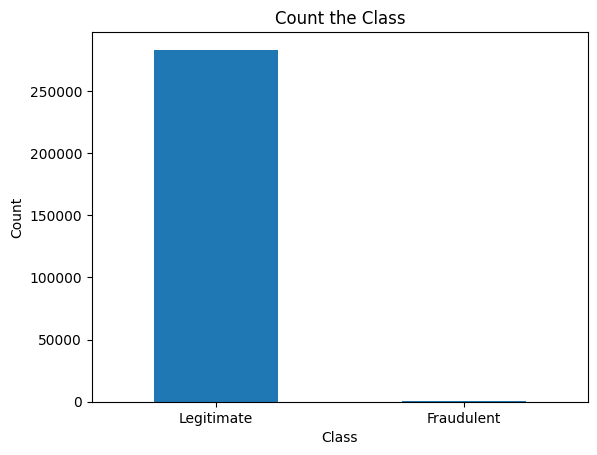

In [12]:
data['Class'].value_counts().plot(kind= 'bar')
plt.title("Count the Class")
plt.xticks(ticks=range(len(data['Class'].value_counts())), 
           labels=['Legitimate', 'Fraudulent'], rotation=0)
plt.ylabel('Count')
plt.show()

**Note:** It is important to observe the significant class imbalance in our original dataset, with the majority of transactions being non-fraudulent. If we use this dataset as the foundation for our predictive models and analysis, there is a risk of substantial errors, as the algorithms may overfit by "assuming" that most transactions are legitimate. However, our goal is not for the model to make assumptions, but rather to identify and learn patterns that indicate fraudulent activity.

Imbalanced dataset
<li>Legitimate Transactions / Class 0 = 283253</li>
<li>Fraudulent Transactions / Class 1 = 473</li>

**Distributions:** Analyzing the distributions allows us to gain insights into the skewness of these features and provides an opportunity to explore the distributions of other features as well. There are techniques available to reduce skewness in the distributions, which will be implemented in this notebook at a later stage.

#### Statistics

In [13]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


<li><strong>Count:</strong> 283,726 observations in the dataset.</li>
<li><strong>Mean:</strong> 94,811.08, indicating the average value of the feature.</li>
<li><strong>Standard Deviation:</strong> 47,481.05, showing considerable variability in the data.</li>
<li><strong>Min:</strong> 0, suggesting the presence of zero or missing values.</li>
<li><strong>25th Percentile (Q1):</strong> 54,204.75, indicating that 25% of the data falls below this value.</li>
<li><strong>Median (50%):</strong> 84,692.50, showing that the midpoint value is closer to the lower quartile.</li>
<li><strong>75th Percentile (Q3):</strong> 139,298, meaning 75% of the data is below this value.</li>
<li><strong>Max:</strong> 172,792, indicating the presence of relatively high values.</li>

**Interpretation:** The data appears right-skewed, with significant variability and potential outliers, especially with a range from 0 to 172,792. The presence of zero values and the large standard deviation suggest further investigation is needed.

### Correlation Matrix

<Axes: >

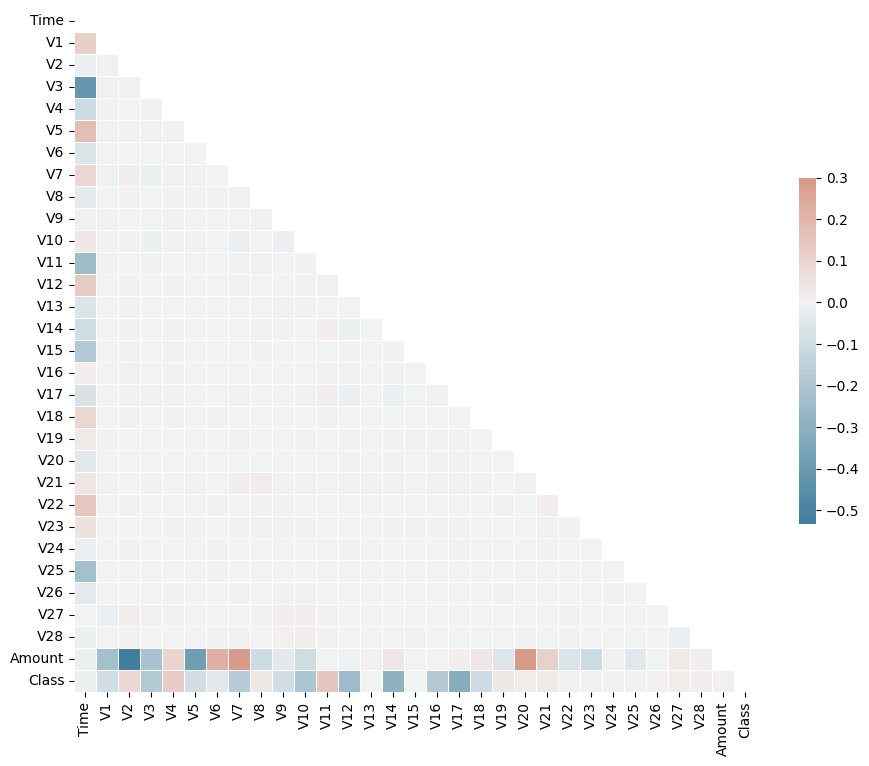

In [14]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


#### Scaling and Distribution: 
In this phase of our analysis, we will first scale the columns representing Time and Amount, as they should be treated on the same scale as the other features. Additionally, we will create a subsample of the dataset to ensure an equal distribution of fraudulent and non-fraudulent cases. This balance will help the algorithms better identify the patterns that distinguish fraudulent transactions from legitimate ones.


The **Robust Scaler** is often considered the best choice for scaling features in datasets that contain outliers. Here's why:

1. **Insensitive to Outliers:**
Robust Scaler uses the median and interquartile range (IQR) (i.e., the 25th and 75th percentiles) to scale the data, instead of the mean and standard deviation used by other scalers like StandardScaler.
Since the median and IQR are not affected by extreme outliers, the Robust Scaler is less sensitive to them. This makes it especially useful when the dataset contains large outliers, as it helps ensure that the scaling does not disproportionately impact the scaled values.
2. **Maintains the Distribution of the Data:**
Unlike MinMaxScaler, which can shrink the values of features with outliers into a narrow range, the Robust Scaler maintains the distribution of the data. It scales the feature based on the middle 50% of the data, ensuring that features with outliers retain their characteristic spread.
3. **Better for Data with Skewed Distributions:**
In cases where the data is skewed, using the Robust Scaler can be a better option because it reduces the effect of outliers while preserving the overall structure of the data.
This is particularly important in machine learning algorithms, where the model's performance can degrade if features with outliers are scaled improperly.

In [15]:
scaler = RobustScaler()

data.loc[:, 'Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data.loc[:, 'Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.774718,0
1,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.268530,0
2,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.959811,0
3,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.411487,0
4,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.667362,0


#### Separate Features and Labels

In [16]:
X = data.drop('Class', axis=1)
y = data['Class']

#### Perform Sampling Technique

Using SMOTE (Synthetic Minority Over-sampling Technique) from imblearn.over_sampling is a popular technique for handling class imbalance in datasets, particularly when working with binary classification problems. Here's why SMOTE is useful:

1. **Addresses Class Imbalance:**
In many real-world datasets, especially in fraud detection or medical diagnosis, the number of instances in one class (e.g., non-fraudulent transactions) far outweighs the number in the other class (e.g., fraudulent transactions).
Class imbalance can lead to poor model performance because most algorithms are biased towards the majority class, often resulting in high accuracy but poor predictions for the minority class.
SMOTE generates synthetic data points for the minority class (e.g., fraud cases) by creating new, artificial samples based on existing minority class samples. This helps balance the class distribution, allowing the model to better learn the patterns of the minority class.
2. **Helps Prevent Overfitting:**
Simply duplicating instances of the minority class (via random oversampling) can lead to overfitting, as the model memorizes the duplicated data rather than learning meaningful patterns.
SMOTE, on the other hand, creates synthetic examples by interpolating between existing samples in the feature space. This results in a more diverse and realistic set of examples for the minority class, reducing the risk of overfitting.
3. **Improves Model Performance:**
By balancing the class distribution, SMOTE ensures that the model gives equal importance to both classes during training. As a result, algorithms can more effectively identify patterns and make better predictions, particularly for the minority class.
Common metrics like Precision, Recall, and F1-score (which are more meaningful in imbalanced datasets than simple accuracy) are improved when using SMOTE, as the model learns to predict the minority class more effectively.
4. **How SMOTE Works:**
SMOTE works by selecting a sample from the minority class and finding its k-nearest neighbors. It then generates new synthetic samples by creating new points along the line segments connecting the sample to its neighbors.
This method increases the diversity of the minority class and ensures that the synthetic data is more realistic, as it lies within the feature space of the original data.


**Class Imbalance:** By using SMOTE in this imbalanced dataset Legitimate Transactions: 99.83%d andFraudulent Transactions: 0.17%d) will be  beneficial for improving model performance.

In [17]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [18]:
print(f"Shape of X: {X_res.shape}")
print(f"Shape of y: {y_res.shape}")

Shape of X: (566506, 30)
Shape of y: (566506,)


#### Combine to new a dataframe

In [19]:
# Convert X_res (which is a NumPy array) to a DataFrame
X_res_df = pd.DataFrame(X_res, columns=X.columns)  # Use original column names from X

# Convert y_res (which is a NumPy array) to a DataFrame
y_res_df = pd.DataFrame(y_res, columns=['Class'])  # Assuming 'Class' is the label column

# Combine the features and the target variable
data_resampled = pd.concat([X_res_df, y_res_df], axis=1)

# Display the first few rows of the combined dataframe
data_resampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.774718,0
1,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.268530,0
2,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.959811,0
3,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.411487,0
4,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.667362,0


## Plot the Sampled Data

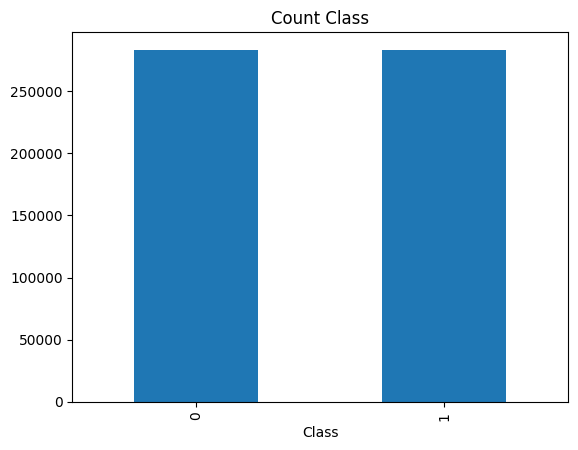

In [20]:
y_res.value_counts().plot(kind= 'bar')
plt.title("Count Class")
plt.show()

In [21]:
legit_transac = data_resampled[data_resampled['Class'] == 0]
fraud_transac = data_resampled[data_resampled['Class'] == 1]

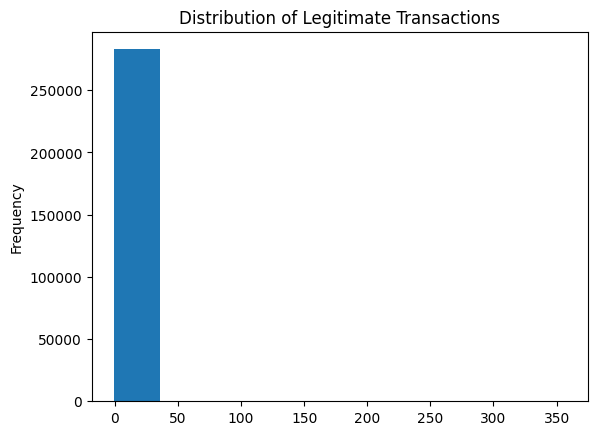

In [22]:
legit_transac['Amount'].plot(kind='hist', bins= 10)
plt.title("Distribution of Legitimate Transactions")
plt.show()

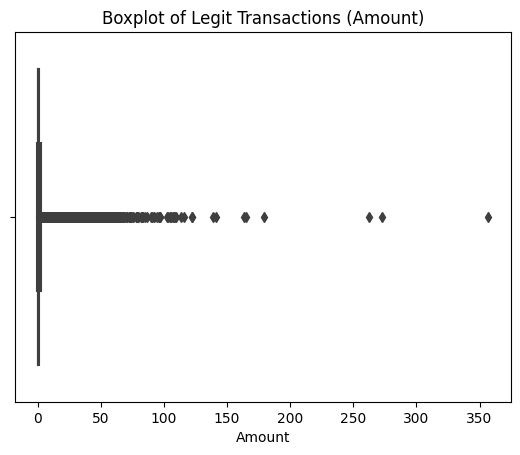

In [23]:
# Create a boxplot for the 'Amount' feature in legit_transac
sns.boxplot(x=legit_transac['Amount'])
plt.title("Boxplot of Legit Transactions (Amount)")

plt.show()

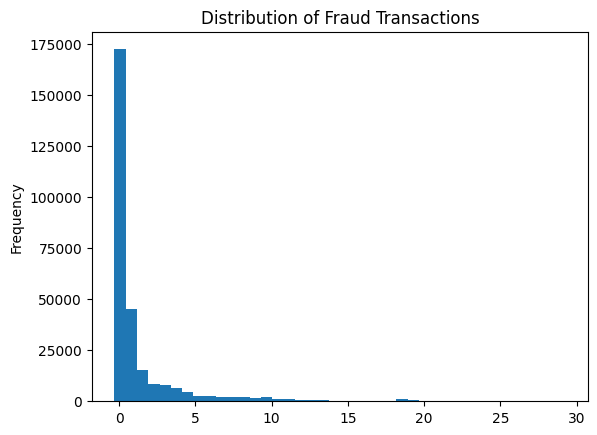

In [24]:
fraud_transac['Amount'].plot(kind='hist', bins=40)
plt.title("Distribution of Fraud Transactions")

plt.show()

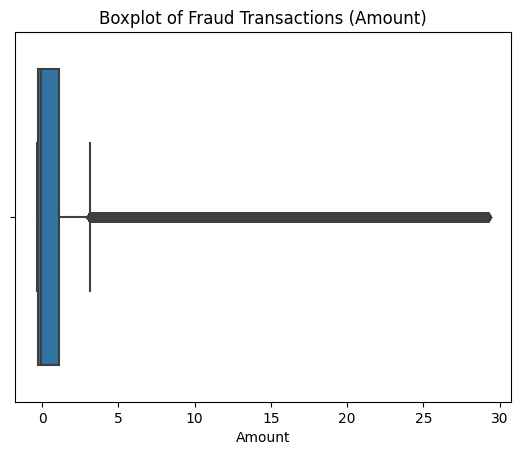

In [25]:
# Create a boxplot for the 'Amount' feature in fraud_transac
sns.boxplot(x=fraud_transac['Amount'])
plt.title("Boxplot of Fraud Transactions (Amount)")

plt.show()

## Develop Machine Learning Classification Models

#### Why Use a Classification Model for Credit Card Fraud Detection?

Credit card fraud detection is a classic supervised machine learning problem where the goal is to predict whether a given transaction is fraudulent or legitimate based on certain features (e.g., transaction amount, time, location, merchant, etc.). Classification models are highly suitable for this type of problem for several reasons:

1. **Binary Classification Problem:**
Credit card fraud detection is essentially a binary classification problem where the objective is to classify each transaction into one of two categories:
Fraudulent (fraud)
Legitimate (non-fraud)
These two classes form the core of any classification model, where the model learns to distinguish between these two outcomes based on the input features.
2. **Predicting Fraudulent Transactions:**
The primary goal is to predict whether a given transaction is fraudulent or legitimate, which is a classification task.
Based on historical data, the model can learn from past transactions (with labels indicating whether each was fraudulent or legitimate) to identify patterns that distinguish the two categories.
3. **Model Interpretability and Decision Making:**
Classification models provide interpretable outputs such as class probabilities, which can be used to assess how likely a transaction is fraudulent.
This helps businesses or financial institutions make informed decisions about whether to flag a transaction as suspicious or allow it to proceed. It also aids in fine-tuning fraud detection mechanisms by adjusting thresholds for classification (e.g., "flag as fraud if the probability is over 80%").
4. **Handling Imbalanced Data:**
In credit card fraud detection, fraudulent transactions are usually much less frequent compared to legitimate ones, resulting in an imbalanced dataset. However, classification models (especially those using techniques like SMOTE or undersampling/oversampling) can help balance the classes and improve model performance.
By using techniques like precision, recall, and F1-score, which focus on detecting fraud (minority class), we ensure the model performs well despite the class imbalance

#### Split the Dataset for Test and Train

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

## Model Building

#### Logistic Regression

In [27]:
lr = LogisticRegression(solver='liblinear', max_iter=1000)
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test)

In [28]:
# Evaluate the model
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Performance:
Accuracy: 0.9466205362659088
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56463
           1       0.97      0.92      0.95     56839

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302



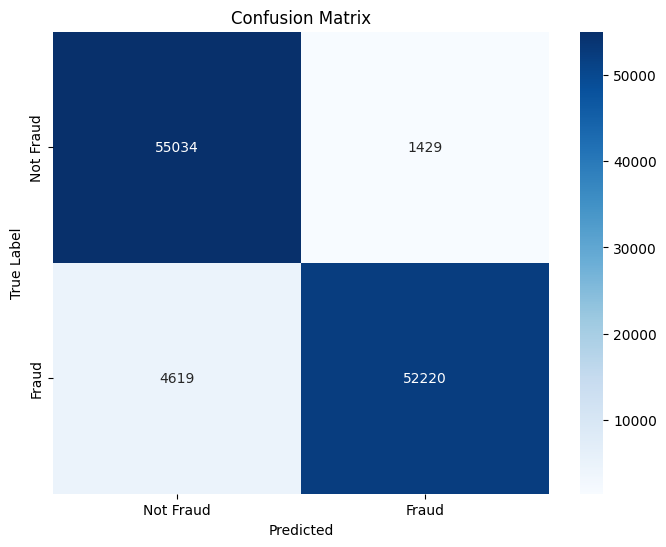

In [29]:
# Confusion Matrix
# y_pred contains probabilities, convert them to class labels by applying a threshold (0.5 for binary classification)
y_pred_class_lr = (y_pred_lr >= 0.5).astype(int)

# Create the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'], 
            annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

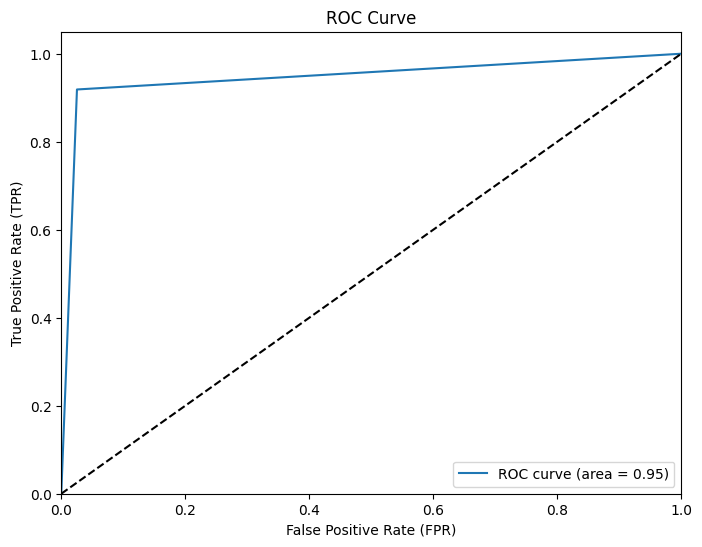

In [30]:
# ROC Curve and AUC-ROC Score
# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test.astype(int), y_pred_class_lr)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## XGBoost Classifier

This is used to address class imbalance in a credit card fraud detection model, specifically when training an XGBoost classifier.

**Calculate Class Imbalance:** The code first calculates the number of fraud (fraud_count) and non-fraud (non_fraud_count) cases in the training data. It then computes the ratio_of_classes, which represents the imbalance between the two classes.

**Adjust for Imbalance:** The scale_pos_weight parameter in the XGBClassifier is set to this ratio, which helps the model better handle the imbalanced dataset by giving more weight to the minority class (fraud).

**Model Initialization and Training:** The XGBoost model is initialized with specific hyperparameters (e.g., max_depth, n_estimators, learning_rate, and gamma for regularization) and then trained using the training data (X_train, y_train).

**Model Prediction:** Finally, the model is used to make predictions on the test set (X_test), enabling the evaluation of its performance in detecting fraud.

This approach helps improve the model's ability to detect fraudulent transactions despite the class imbalance in the dataset.

In [31]:
# Assuming y_train is the target variable with labels for fraud (1) and non-fraud (0)
fraud_count = (y_train == 1).sum()  # Number of fraud cases (1)
non_fraud_count = (y_train == 0).sum()  # Number of non-fraud cases (0)

# Calculate the ratio
ratio_of_classes = non_fraud_count / fraud_count

# Now initialize the XGBClassifier with scale_pos_weight set to ratio_of_classes
xgb = XGBClassifier(
    max_depth=3,
    n_estimators=100,
    learning_rate=0.1,
    gamma=0.1,  # Regularization
    scale_pos_weight=ratio_of_classes  # Adjust for class imbalance
)

# Fit the model on the training data
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test)


In [32]:
# Evaluate the model
print("XGBoost Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(classification_report(y_test, y_pred_xgb))


XGBoost Classifier Performance:
Accuracy: 0.9766641365554006
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56463
           1       0.99      0.97      0.98     56839

    accuracy                           0.98    113302
   macro avg       0.98      0.98      0.98    113302
weighted avg       0.98      0.98      0.98    113302



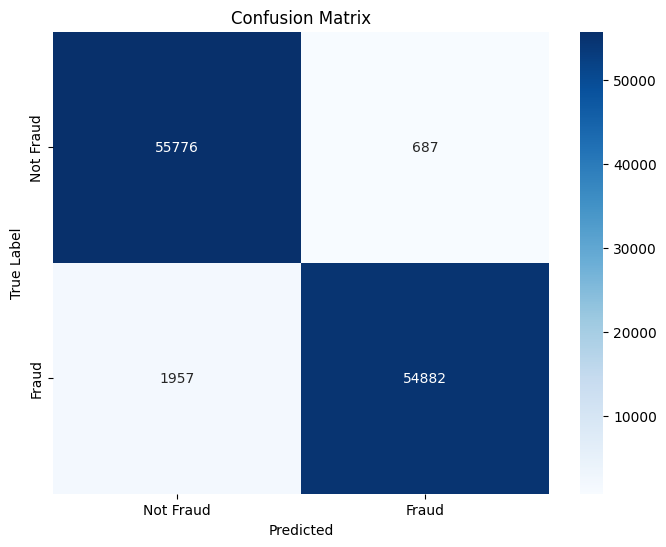

In [33]:
# Confusion Matrix
# y_pred contains probabilities, convert them to class labels by applying a threshold (0.5 for binary classification)
y_pred_class_xgb = (y_pred_xgb >= 0.5).astype(int)

# Create the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'], 
            annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

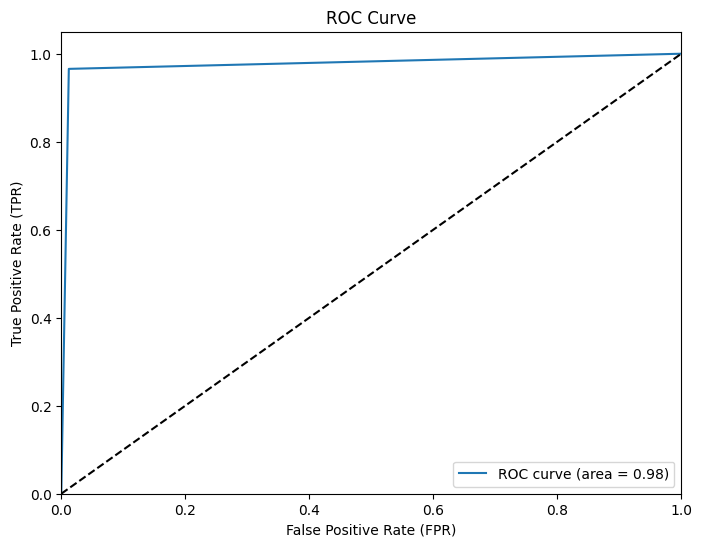

In [34]:
# ROC Curve and AUC-ROC Score
# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test.astype(int), y_pred_class_xgb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### SHAP (Shapley Additive Explanations) Values

**SHAP** values provide a more detailed and explainable approach to understanding how each feature affects the model's predictions. SHAP values break down each prediction and show how much each feature contributes to the final prediction.

**Interpreting SHAP values:**

**Positive SHAP value:** A feature pushes the prediction toward the positive class (fraud).
**Negative SHAP value:** A feature pushes the prediction toward the negative class (non-fraud).
**Magnitude of SHAP value:** The magnitude tells you how much influence the feature had on the model's decision.

For example, if the feature "Transaction Amount" has a large positive SHAP value for a particular fraud case, this suggests that the higher the transaction amount, the more likely the transaction is to be fraud.

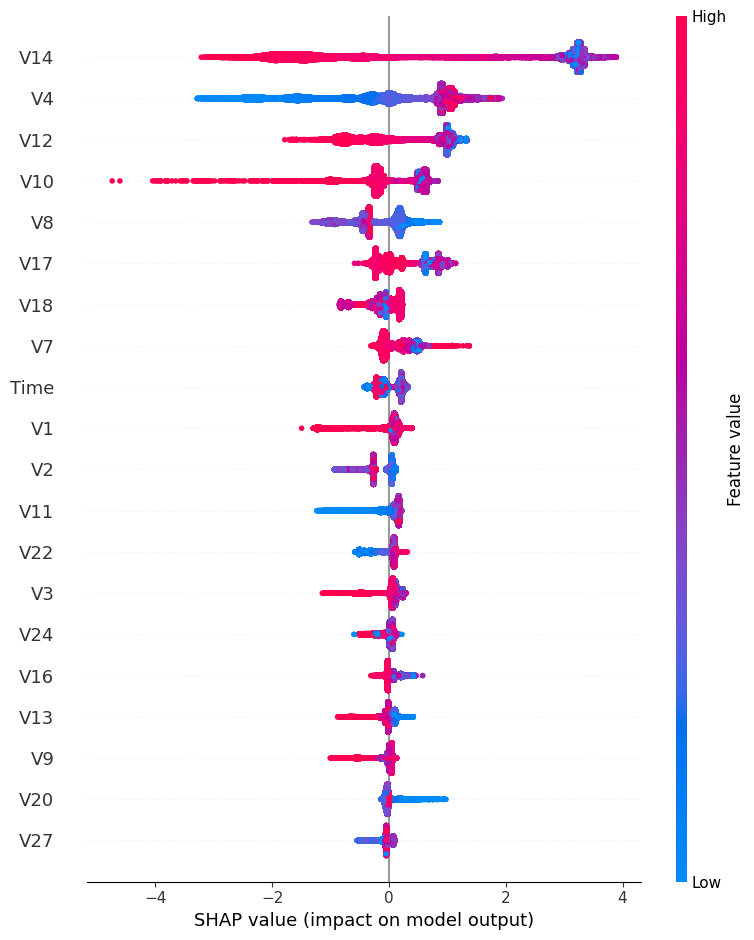

In [35]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


## Summary

In this project, I developed two machine learning models—Logistic Regression and XGBoost Classifier—to detect fraudulent credit card transactions. The dataset was highly imbalanced, with far more legitimate transactions than fraudulent ones, so various techniques like resampling and class weight adjustment were employed to improve model performance.

1. **Logistic Regression Performance:**
**Accuracy:** 94.66%
**Precision:** 0.97 for fraud (1), 0.92 for non-fraud (0)
**Recall:** 0.92 for fraud (1), 0.97 for non-fraud (0)
**F1-score:** 0.95 for both classes
**Interpretation:** The Logistic Regression model performs well with balanced precision and recall. It is able to effectively predict both fraud and non-fraud transactions, achieving a high accuracy of 94.66%. However, recall for fraud cases (92%) is slightly lower than for non-fraud (97%), meaning it misses a few fraud cases.

3. **XGBoost Classifier Performance:**
**Accuracy:** 97.67%
**Precision:** 0.99 for fraud (1), 0.97 for non-fraud (0)
**Recall:** 0.97 for fraud (1), 0.99 for non-fraud (0)
**F1-score:** 0.98 for both classes
**Interpretation:** The XGBoost model outperforms Logistic Regression with a higher accuracy of 97.67%. It achieves excellent performance in both precision and recall, particularly for fraud detection, with a recall of 97% and precision of 99%. This indicates a lower number of missed fraud cases (false negatives) and fewer incorrect non-fraud predictions (false positives).

#### Conclusion:

**Logistic Regression** offers good performance with a solid balance between precision and recall but with a slight trade-off in detecting fraud cases compared to **XGBoost**.
**XGBoost Classifier**, with its ability to handle imbalanced data through techniques like scale_pos_weight, performs better, achieving higher precision and recall for detecting fraudulent transactions.
Both models demonstrate strong performance in this highly imbalanced credit card fraud detection task, but XGBoost provides a more robust solution with superior overall accuracy and balance between the two classes.
This project demonstrates how advanced machine learning models can be effectively utilized to identify fraud in credit card transactions, minimizing financial risk and protecting consumers.